   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
376.5852530821279
380.56


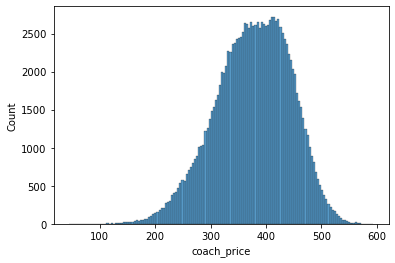

<Figure size 432x288 with 0 Axes>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

## visualise prices for 
print(np.mean(flight.coach_price))
print(np.median(flight.coach_price))

sns.histplot(flight['coach_price'])
plt.show()
plt.clf()

431.8343773728164
437.115


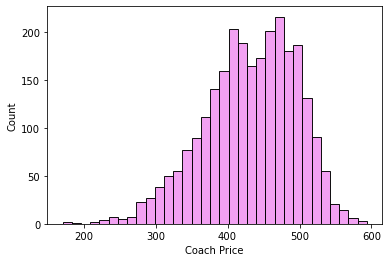

<Figure size 432x288 with 0 Axes>

In [41]:
#visualise flights that are 8 hours long

flight_8hours = flight[flight['hours'] == 8]
print(np.mean(flight_8hours.coach_price))
print(np.median(flight_8hours.coach_price))
sns.histplot(flight_8hours['coach_price'], color='violet')

plt.xlabel('Coach Price')
plt.show()
plt.clf()

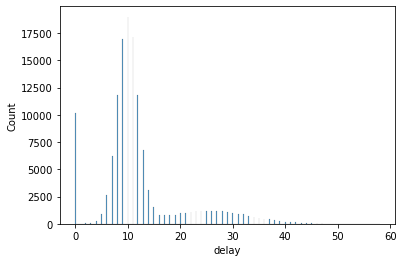

<Figure size 432x288 with 0 Axes>

In [42]:
#investigate delays, removing any large values

sns.histplot(flight.delay[flight.delay <= 500])
plt.show()
plt.clf()

In [43]:
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

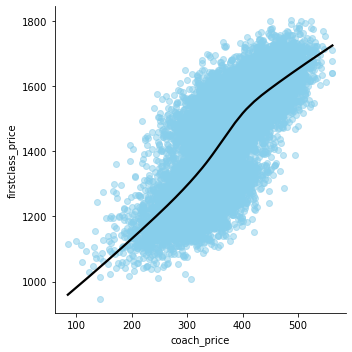

<Figure size 432x288 with 0 Axes>

In [57]:
#Is there a correlation between prices of first class and coach?
#sns.scatterplot(x=flight.coach_price, y=flight.firstclass_price, alpha=0.5)
sns.lmplot(x='coach_price', y='firstclass_price', data=flight_sub, scatter_kws = {"color": "skyblue", "alpha": 0.5},
            line_kws = {"color": "black"}, lowess=True)
plt.show()
plt.clf()

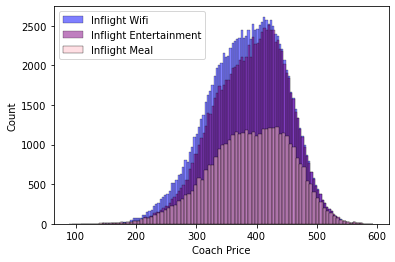

<Figure size 432x288 with 0 Axes>

In [58]:
flight_meal = flight[flight['inflight_meal'] == 'Yes']
flight_entertainment = flight[flight['inflight_entertainment'] == 'Yes']
flight_wifi = flight[flight['inflight_wifi'] == 'Yes']

sns.histplot(data=flight_wifi, x="coach_price",color="blue", label="Inflight Wifi", alpha=0.5)
sns.histplot(data=flight_entertainment, x="coach_price",color="purple", label="Inflight Entertainment", alpha=0.5)
sns.histplot(data=flight_meal, x="coach_price",color="pink", label="Inflight Meal", alpha=0.5)


plt.legend()
plt.xlabel('Coach Price')
plt.show()
plt.clf()

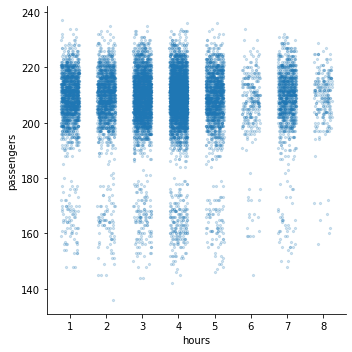

<Figure size 432x288 with 0 Axes>

In [59]:
#investigating how the number of passengers changes with flight duration

sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)

plt.show()
plt.clf()

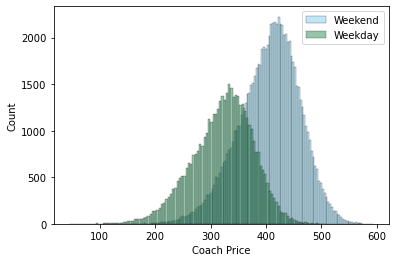

<Figure size 432x288 with 0 Axes>

In [60]:
flight_weekend = flight[flight['weekend'] == 'Yes']
flight_weekday = flight[flight['weekend'] == 'No']

sns.histplot(data=flight_weekend, x="coach_price",color="skyblue", label="Weekend", alpha=0.5)
sns.histplot(data=flight_weekday, x="coach_price",color="seagreen", label="Weekday", alpha=0.5)

plt.legend()
plt.xlabel('Coach Price')
plt.show()
plt.clf()

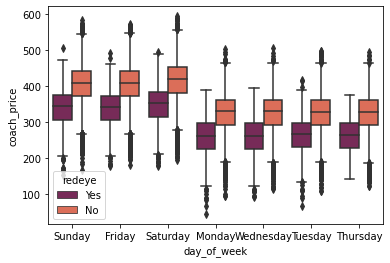

<Figure size 432x288 with 0 Axes>

In [61]:
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight, palette='rocket')
plt.show()
plt.clf()